#Analysis of Historic Euro Daily Exchange Rates

In this project  we'll analyze a dataset that holds daily Euro (€) exchange rates, between Jan 1999 and Jan 2021. The goal is to ...

## The Results

## The Dataset
The dataset is available on [Kaggle](https://www.kaggle.com/lsind18/euro-exchange-daily-rates-19992020). Its source is the European Central Bank and it was put together by Daria Chemkaeva.

In [2]:
# Boilerplate code that loads the libraries and data
import pandas as pd
import numpy as np
exchange_rates = pd.read_csv("euro-daily-hist_1999_2020.csv")

# Allow Jupyter notebook to generate plots
import matplotlib.pyplot as plt
%matplotlib inline

exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              5699 non-null   object 
 1   [Australian dollar ]      5699 non-null   object 
 2   [Bulgarian lev ]          5297 non-null   object 
 3   [Brazilian real ]         5431 non-null   object 
 4   [Canadian dollar ]        5699 non-null   object 
 5   [Swiss franc ]            5699 non-null   object 
 6   [Chinese yuan renminbi ]  5431 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           5699 non-null   object 
 9   [Danish krone ]           5699 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      5699 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       5699 non-null   object 
 14  [Croatia

In [3]:
print(f"Number of columns with missing values: {exchange_rates.isnull().any().sum()}")

Number of columns with missing values: 17


The dataset has 5,699 rows and 41 columns - 40 currency columns and a period/unit (time) column.
three columns are of type float64, where the rest are int64; 17 columns have missing entries, but since we're only interested in the Euro to US Dollar exchange rates, that doesn't really matter.

## Data Cleaning

In [4]:
# Give relevant columns proper names
exchange_rates.rename(columns={'[US dollar ]': 'US_dollar',
                               'Period\\Unit:': 'Time'},
                      inplace=True)

# Convert time text data to datetime
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])


exchange_rates.sort_values('Time', inplace=True)
exchange_rates.reset_index(drop=True, inplace=True)

Since we'd like to focus only on the US Dollar exchange rates, we'll create a new dataframe with only the desired data.

In [5]:
euro_to_dollar = exchange_rates[['Time', 'US_dollar']]
euro_to_dollar['US_dollar'].value_counts()

-         62
1.2276     9
1.1215     8
1.1305     7
1.2713     6
          ..
1.4848     1
1.1258     1
0.8751     1
1.0813     1
0.9556     1
Name: US_dollar, Length: 3528, dtype: int64

The US_dollar column has 62 blank ('-') entries. Let's drop them:

In [6]:
euro_to_dollar = euro_to_dollar.copy()[euro_to_dollar['US_dollar'] != '-']

In [7]:
euro_to_dollar['US_dollar'].value_counts()

1.2276    9
1.1215    8
1.1305    7
1.3086    6
1.3532    6
         ..
1.4656    1
0.9490    1
1.4848    1
1.1258    1
0.9556    1
Name: US_dollar, Length: 3527, dtype: int64

Finally, let's convert the column to float, to allow better manipulation and analysis:

In [8]:
euro_to_dollar['US_dollar'] = euro_to_dollar['US_dollar'].astype(float)

## Analysis

Now that we're finished cleaning the data, we'll generate a line plot to visualize the evolution of the euro-dollar exchange rate.

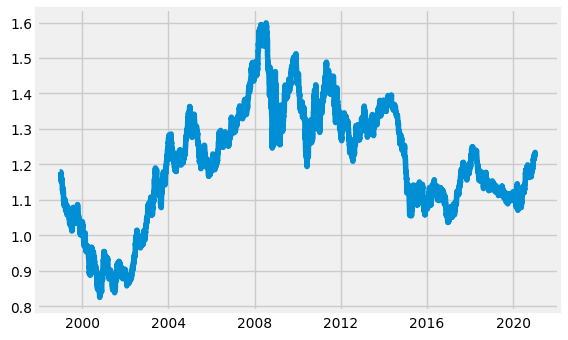

In [9]:
plt.plot(euro_to_dollar['Time'],
         euro_to_dollar['US_dollar'])
plt.show()

This is a classic daily exchange rate plot. We can identify yearly or even monthly trends, but the daily fluctuations are too small, and only appear as small wiggles on the graph.
To make the graph a bit smoother, and help the reader focus on the larger trends, we're going to plot a monthly rolling mean instead of the daily values.

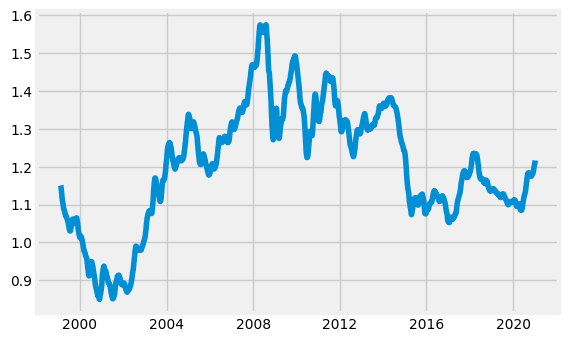

In [10]:
# Create a columns named rolling_mean which will hold the average
# exchange rate over the last 30 days
euro_to_dollar['rolling_mean'] = euro_to_dollar['US_dollar'].rolling(30).mean()

plt.plot(euro_to_dollar['Time'],
         euro_to_dollar['rolling_mean'])
plt.show()

Now, let's see how the averaged Euro-to-Dollar exchange rate for each of the US presidents in office over the main period (2001-2020):

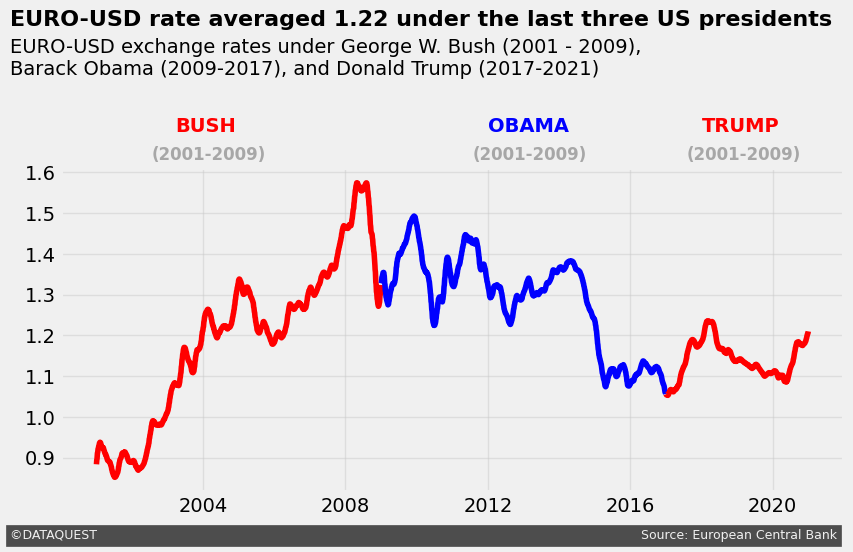

In [117]:
import matplotlib.style as style

RED = '#ff0000'
BLUE = '#0000ff'

def president_text(name, years_text, name_x_coords, years_x_coords, color):
    ax.text(name_x_coords, 1.7, name, fontsize=14, color=color, weight='bold')
    ax.text(years_x_coords, 1.63, years_text, fontsize=12, weight='bold', alpha=0.3)

# We'll be using the Five Thirty Eight style as a base for our graph
style.use('fivethirtyeight')

fig, ax = plt.subplots(figsize=(9, 4))

# Split the dataset into 3 datasets, by the US president in office
bush = euro_to_dollar.copy()[(euro_to_dollar['Time'].dt.year >= 2001) & (euro_to_dollar['Time'].dt.year < 2009)]
obama = euro_to_dollar.copy()[(euro_to_dollar['Time'].dt.year >= 2009) & (euro_to_dollar['Time'].dt.year < 2017)]
trump = euro_to_dollar.copy()[(euro_to_dollar['Time'].dt.year >= 2017) & (euro_to_dollar['Time'].dt.year < 2021)]

# Plot the graph
ax.plot(bush['Time'], bush['rolling_mean'],
        color=RED)
ax.plot(obama['Time'], obama['rolling_mean'],
        color=BLUE)
ax.plot(trump['Time'], trump['rolling_mean'],
        color=RED)
ax.grid(alpha=0.5)

# Header
ax.text(729600.0, 1.96, 'EURO-USD rate averaged 1.22 under the last three US presidents',
         fontsize=16, weight='bold')
ax.text(729600.0, 1.84, '''EURO-USD exchange rates under George W. Bush (2001 - 2009),
Barack Obama (2009-2017), and Donald Trump (2017-2021)''', fontsize=14)

# Bush
president_text("BUSH", "(2001-2009)", 731300.0, 731050.0, RED)
# Obama
president_text("OBAMA", "(2001-2009)", 734500.0, 734350.0, BLUE)
#Trump
president_text("TRUMP", "(2001-2009)", 736700.0, 736540.0, RED)
# Footer

ax.text(729600.0, 0.7, '©DATAQUEST' + ' ' * 136 + 'Source: European Central Bank',
        color = '#f0f0f0', backgroundcolor = '#4d4d4d',
       size=9)

plt.show()

In [120]:
exchange_rates.rename(columns={'[Israeli shekel ]': 'ILS'},
                      inplace=True)
euro_to_ils = exchange_rates[['Time', 'ILS']]
euro_to_ils = euro_to_ils.copy()[euro_to_ils['ILS'] != '-']
euro_to_ils['ILS'].value_counts()

4.7301    4
4.2236    4
4.8180    4
4.2182    4
5.5277    4
         ..
4.0597    1
4.6926    1
4.8295    1
4.4126    1
3.6375    1
Name: ILS, Length: 4605, dtype: int64

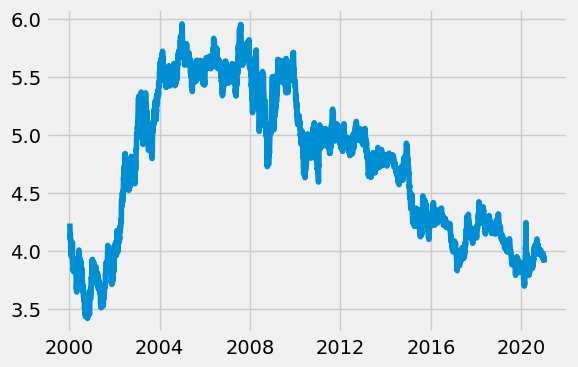

In [121]:
plt.plot(euro_to_ils['Time'],
         euro_to_ils['ILS'])
plt.show()